### Importando bibliotecas e lendo o dataset

In [2]:
import numpy as np
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

df = pd.read_csv("fertilizer.csv")

### Entendendo o dataset

In [4]:
df.shape

(205, 9)

In [5]:
df.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,30.204878,58.990244,43.590244,18.814634,3.219512,18.634146
std,3.592882,5.973791,11.236665,11.273115,5.571778,13.494654
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,27.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,42.000000,14.000000,0.000000,18.000000
75%,33.000000,64.000000,51.000000,24.000000,7.000000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [7]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [8]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [7]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [8]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [3]:
df.loc[df.duplicated()]

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
99,36,68,38,Sandy,Barley,7,9,30,14-35-14
100,26,52,48,Loamy,Wheat,23,0,19,28-28
101,28,54,35,Black,Millets,41,0,0,Urea
102,30,60,61,Loamy,Cotton,8,10,31,14-35-14
103,37,70,37,Clayey,Paddy,12,0,41,DAP
...,...,...,...,...,...,...,...,...,...
200,29,58,34,Sandy,Millets,15,0,37,DAP
201,27,54,30,Clayey,Pulses,13,0,13,20-20
202,30,60,58,Loamy,Sugarcane,10,7,32,14-35-14
203,32,62,34,Red,Tobacco,22,0,24,28-28


In [9]:
df.isna()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False


### Analisando dataset

<Axes: xlabel='Fertilizer Name', ylabel='count'>

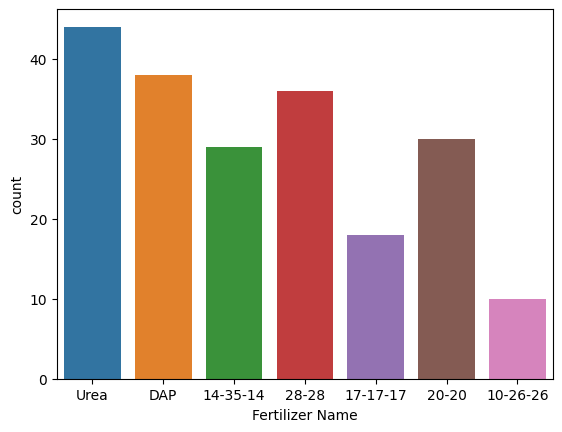

In [11]:
import seaborn as sns
sns.countplot(x='Fertilizer Name', data = df)

<Axes: xlabel='Soil Type', ylabel='count'>

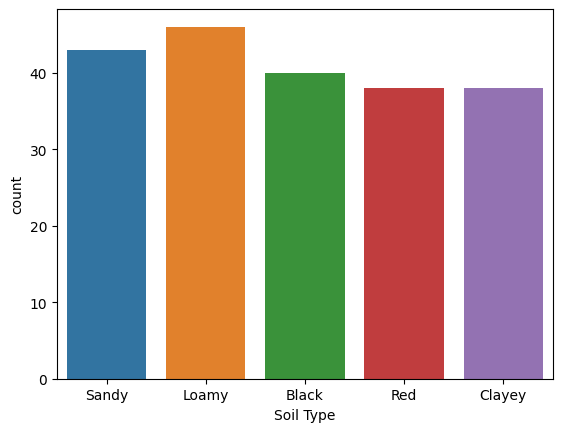

In [12]:
sns.countplot(x='Soil Type', data = df)


<Axes: xlabel='Crop Type', ylabel='count'>

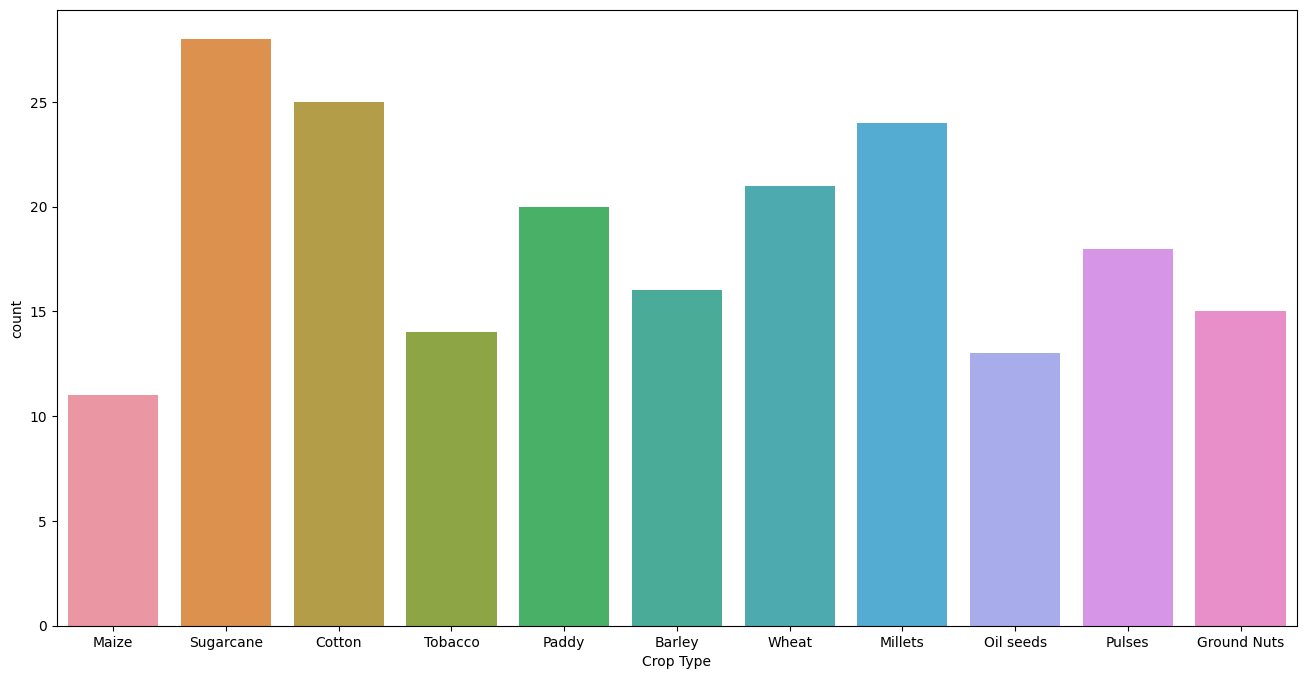

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Crop Type', data = df)

Quantidade equilibrada de 'Crop Type' e 'Soil Type', mas alguns 'Fertilizer Name' ocorrem bem menos que outros

<Axes: xlabel='Fertilizer Name', ylabel='Temparature'>

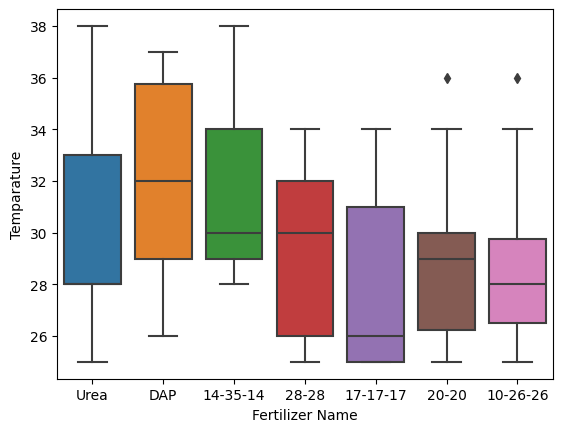

In [14]:
sns.boxplot(y = df['Temparature'], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Humidity '>

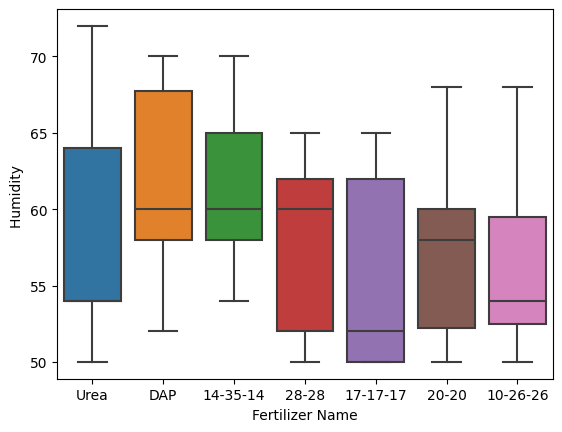

In [15]:
sns.boxplot(y = df['Humidity '], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Moisture'>

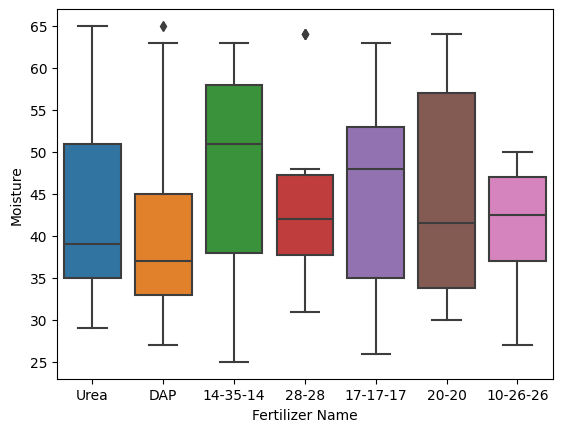

In [16]:
sns.boxplot(y = df['Moisture'], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Potassium'>

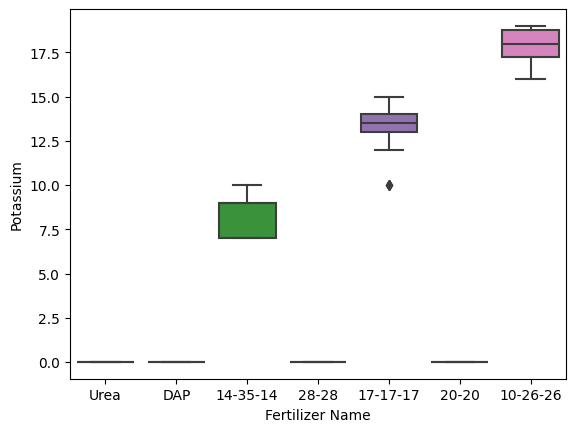

In [17]:
sns.boxplot(y = df['Potassium'], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Phosphorous'>

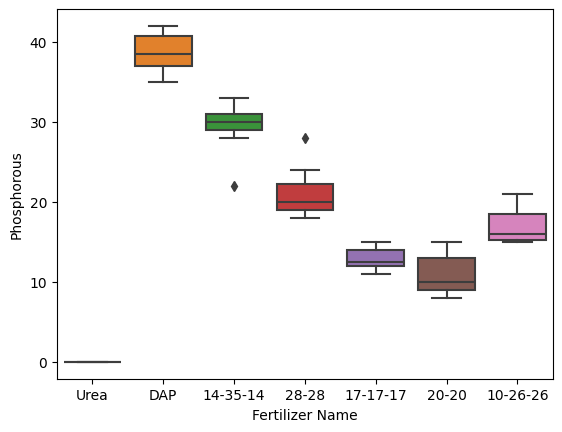

In [18]:
sns.boxplot(y = df['Phosphorous'], x = df['Fertilizer Name'])

<Axes: xlabel='Fertilizer Name', ylabel='Nitrogen'>

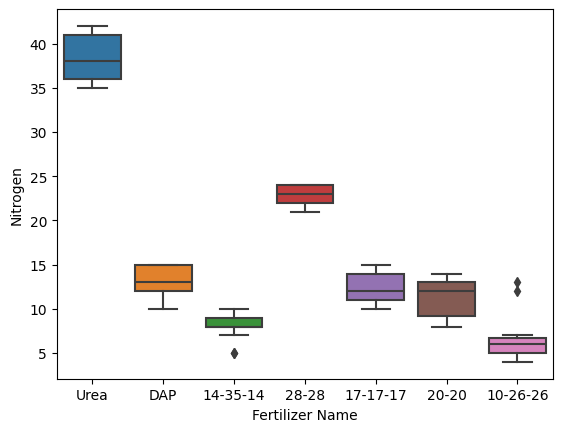

In [19]:
sns.boxplot(y = df['Nitrogen'], x = df['Fertilizer Name'])

### Label encoder

In [20]:
from sklearn.preprocessing import LabelEncoder

soil_encoder = LabelEncoder()
df['Soil Type'] = soil_encoder.fit_transform(df['Soil Type'])

df['Soil Type'].unique()

array([4, 2, 0, 3, 1])

In [21]:
crop_encoder = LabelEncoder()
df['Crop Type'] = crop_encoder.fit_transform(df['Crop Type'])

df['Crop Type'].unique()

array([ 3,  8,  1,  9,  6,  0, 10,  4,  5,  7,  2])

In [22]:
fertilizer_encoder = LabelEncoder()
df['Fertilizer Name'] = fertilizer_encoder.fit_transform(df['Fertilizer Name'])

df['Fertilizer Name'].unique()

array([6, 5, 1, 4, 2, 3, 0])

### Separando dados para treino e teste

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (164, 8), y_train = (164,), x_test = (41, 8), y_test = (41,)


### Implementando Random Forest Classifier

In [24]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

pred_rand = rand.predict(x_test)

accuracy = accuracy_score(y_test, pred_rand)

print(classification_report(y_test,pred_rand))
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        10

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Accuracy: 1.0


Utilizando somente o Random Forest Classifier, a precisão do resultado é de 90%

### Hiper parâmetros "tunning" com GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}

grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

Utilizando o GridSearchCV conseguimos chegar 97% !!! uma melhora muito grande

### Importando o ML como pickle para implementação com o Django 

In [ ]:
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

NameError: name 'grid_rand' is not defined